#**Generalidades**

##**Importación de librerías**

In [11]:
from re import I
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


##**Definición de funciones**

In [12]:
# Procesar la columna 'genres'
def extract_genres(genre_json):
    if pd.isnull(genre_json) or genre_json == '':
        return []  # Maneja valores nulos o vacíos
    try:
        # Cargar el JSON
        genres = json.loads(genre_json)
        # Extraer los nombres de los géneros
        return [genre['name'] for genre in genres if 'name' in genre]
    except Exception as e:
        print(f"Error procesando: {genre_json} - {e}")
        return []

def  showDsitribution(df):
  numericas = df.select_dtypes(include=['float64', 'int64']).columns
  for columna in numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[columna], kde=True, bins=30)
    plt.title(f"Distribución de {columna}")
    plt.show()

##**Importación de Datos**

In [13]:
#https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv

import kagglehub

# Download latest version
path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")

print("Path to dataset files:", path)

print(os.listdir(path))


Path to dataset files: /root/.cache/kagglehub/datasets/rounakbanik/the-movies-dataset/versions/7
['ratings.csv', 'credits.csv', 'ratings_small.csv', 'keywords.csv', 'movies_metadata.csv', 'links_small.csv', 'links.csv']


##**Análisis y limpieza de datos**

In [14]:
df = pd.read_csv(path + '/movies_metadata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

<ipython-input-14-ef0dc2fce157>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + '/movies_metadata.csv')


In [15]:
df.sample(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
38288,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,13521,tt0133689,en,Charlie Ve'hetzi,Charlie gets by through fleecing suckers with ...,...,1974-01-01,0.0,105.0,"[{'iso_639_1': 'he', 'name': 'עִבְרִית'}]",Released,NaN,Charlie And A Half,False,4.3,2.0
1076,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,146341,tt0115684,es,Bird of Prey,NaN,...,1995-09-12,0.0,105.0,"[{'iso_639_1': 'bg', 'name': 'български език'}...",Released,NaN,Bird of Prey,False,0.0,0.0
11122,False,NaN,72500000,"[{'id': 35, 'name': 'Comedy'}]",http://www.sonypictures.com/homevideo/talladeg...,9718,tt0415306,en,Talladega Nights: The Ballad of Ricky Bobby,Lifelong friends and national idols Ricky Bobb...,...,2006-08-04,162966177.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The story of a man who could only count to #1,Talladega Nights: The Ballad of Ricky Bobby,False,6.2,497.0
155,False,"{'id': 8819, 'name': 'Casper Collection', 'pos...",50000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",NaN,8839,tt0112642,en,Casper,Furious that her late father only willed her h...,...,1995-05-26,287928194.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Get an afterlife,Casper,False,6.0,1045.0
3148,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,10086,tt0103905,fr,C'est arrivé près de chez vous,A camera crew follows a serial killer/thief ar...,...,1992-05-01,0.0,95.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Man Bites Dog,False,7.2,194.0


In [16]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


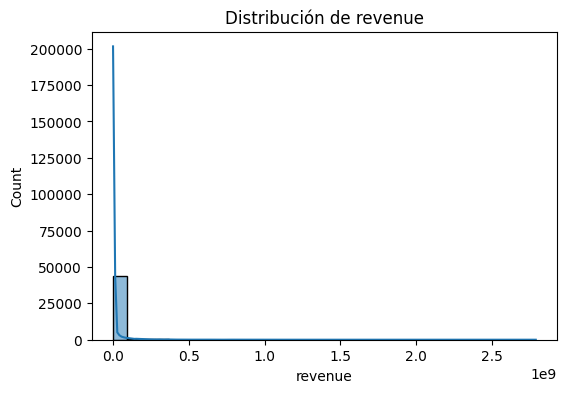

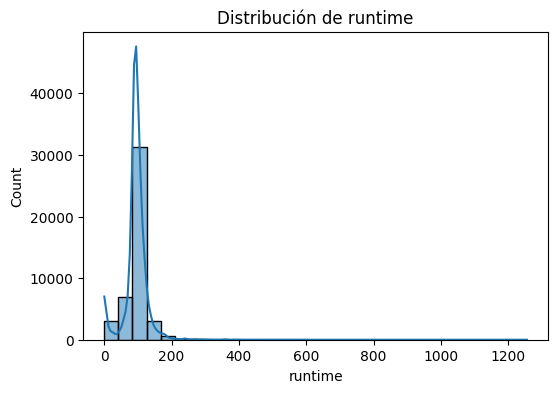

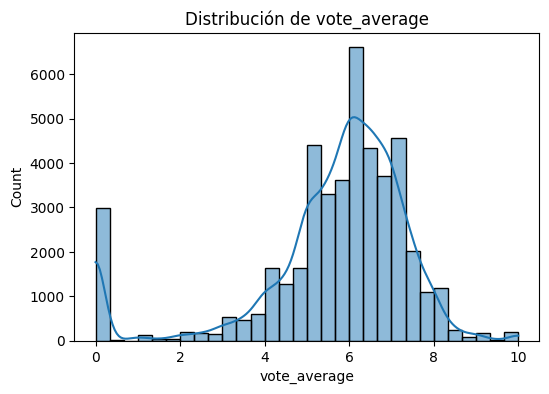

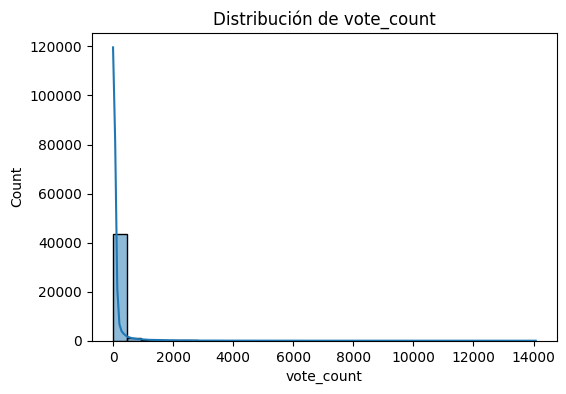

In [17]:
showDsitribution(df)

###Selección de caracerísticas

In [18]:
df_copy = df[['genres','adult','budget','overview','popularity','runtime','tagline','title','vote_average']].copy(deep=True)


In [19]:
#Rellenar tagline vacíos con el titulo
df_copy['tagline'].fillna(df_copy['title'], inplace=True)
df_copy.dropna(inplace=True)
df_copy.reset_index(drop=True, inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44506 entries, 0 to 44505
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        44506 non-null  object 
 1   adult         44506 non-null  object 
 2   budget        44506 non-null  object 
 3   overview      44506 non-null  object 
 4   popularity    44506 non-null  object 
 5   runtime       44506 non-null  float64
 6   tagline       44506 non-null  object 
 7   title         44506 non-null  object 
 8   vote_average  44506 non-null  float64
dtypes: float64(2), object(7)
memory usage: 3.1+ MB


<ipython-input-19-a85b4d874870>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['tagline'].fillna(df_copy['title'], inplace=True)


In [20]:
#Eliminar listas vacías en genres
df_copy.drop(df_copy[df_copy['genres']=='[]'].index, inplace=True)
df_copy.reset_index(drop=True, inplace=True)

In [21]:
#Rellenar buget igual a 0 con la media y convertir columnas numericas
df_copy['budget'] = pd.to_numeric(df_copy['budget'], errors='coerce')
df_copy['budget'] = df_copy['budget'].fillna(0)
df_copy['budget'] = df_copy['budget'].astype(float)

df_copy['popularity'] = pd.to_numeric(df_copy['popularity'], errors='coerce')
df_copy['popularity'] = df_copy['popularity'].fillna(0)
df_copy['popularity'] = df_copy['popularity'].astype(float)

df_copy['runtime'] = pd.to_numeric(df_copy['runtime'], errors='coerce')
df_copy['runtime'] = df_copy['runtime'].fillna(0)
df_copy['runtime'] = df_copy['runtime'].astype(float)

mean_budget = df_copy['budget'][df_copy['budget'] > 0].mean()
df_copy.loc[df_copy['budget'] == 0, 'budget'] = mean_budget

In [22]:
#Mapaer de 1 a 0 el valor booleano
df_copy['adult'] = df_copy['adult'].map({'True': 1, 'False': 0})

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42321 entries, 0 to 42320
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        42321 non-null  object 
 1   adult         42321 non-null  int64  
 2   budget        42321 non-null  float64
 3   overview      42321 non-null  object 
 4   popularity    42321 non-null  float64
 5   runtime       42321 non-null  float64
 6   tagline       42321 non-null  object 
 7   title         42321 non-null  object 
 8   vote_average  42321 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.9+ MB


###Extraer etiquetas en lista

In [24]:
# Extraer los géneros de cada película
mlb = MultiLabelBinarizer()
df_copy['genres'] = df_copy['genres'].str.replace("'", '"')
df_copy['genres'] = df_copy['genres'].apply(json.loads)
df_copy['genres_list'] = df_copy['genres'].apply(lambda x: [d['name'] for d in x])
labels = mlb.fit_transform(df_copy['genres_list'])

# Ver etiquetas y sus valores binarios
print("Géneros únicos:", mlb.classes_)
print("Etiquetas codificadas:\n", labels)

Géneros únicos: ['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']
Etiquetas codificadas:
 [[0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]]


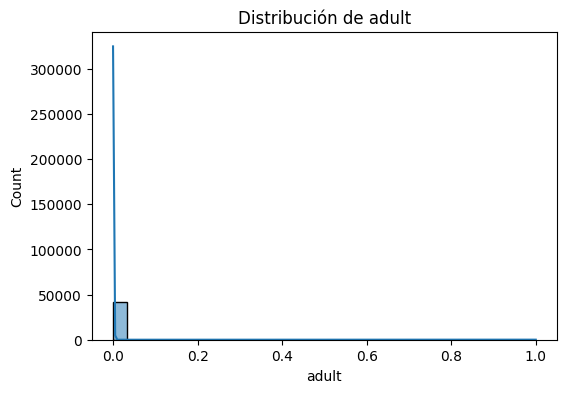

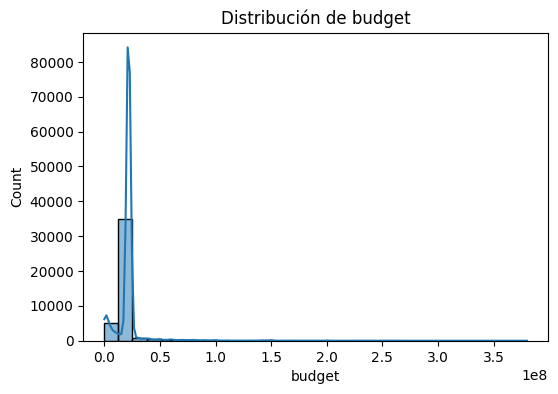

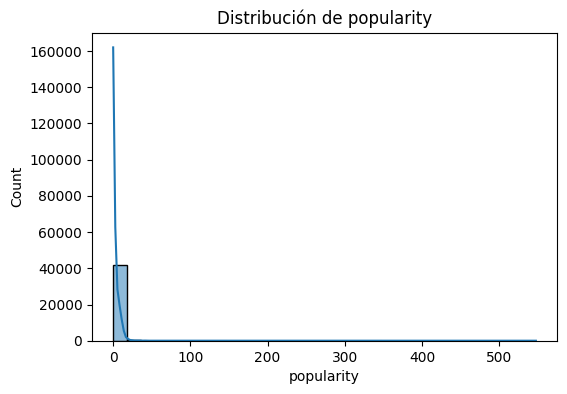

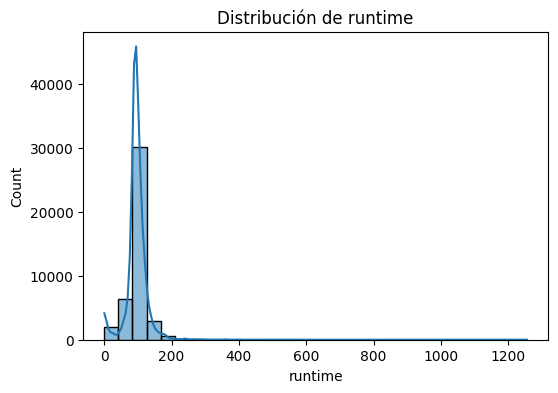

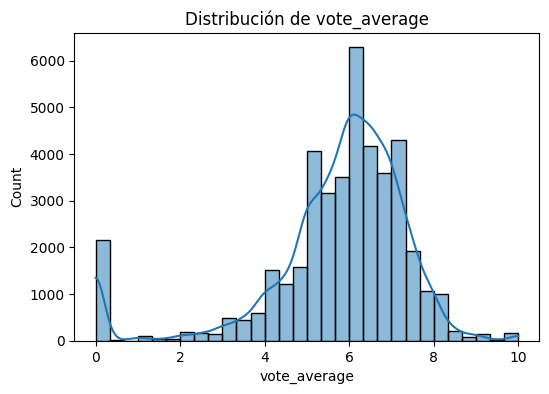

In [25]:
showDsitribution(df_copy)

In [26]:
# Vectorización de textos
vectorizer = TfidfVectorizer(max_features=500)
overview_features = vectorizer.fit_transform(df_copy['overview'].fillna('')).toarray()
tagline_features = vectorizer.fit_transform(df_copy['tagline'].fillna('')).toarray()
title_features = vectorizer.fit_transform(df_copy['title'].fillna('')).toarray()

# Normalización de características numéricas
numerical_features = df_copy[['budget', 'popularity', 'runtime']].fillna(0)
scaler = StandardScaler()
numerical_features = scaler.fit_transform(numerical_features)

# Concatenar todas las características
import numpy as np
X = np.hstack([overview_features, tagline_features, title_features, numerical_features])


###División de datos

In [39]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

#**1. Clasificación: Asuma que la columna género es la etiqueta. Genere modelos que dadas las demás características identifiquen los géneros (puede ser más de un género) a los que más se asocia la película. (Debe consultar cómo proceder cuando la etiqueta tiene varios valores para cada ejemplo).**

##Entrenamiento multilabel

###Regresión logistica

In [18]:

# Crear y entrenar el modelo
model = OneVsRestClassifier(LogisticRegression(max_iter=500))
model.fit(X_train, y_train)


OneVsRestClassifier(estimator=LogisticRegression(max_iter=500))

In [19]:
# Evaluación del modelo
Y_pred = model.predict(X_test)
print(classification_report(y_test, Y_pred, target_names=mlb.classes_))


                 precision    recall  f1-score   support

         Action       0.64      0.30      0.41      1256
      Adventure       0.63      0.15      0.25       732
      Animation       0.65      0.23      0.34       376
         Comedy       0.68      0.41      0.52      2588
          Crime       0.62      0.22      0.32       813
    Documentary       0.85      0.59      0.70       782
          Drama       0.69      0.69      0.69      3995
         Family       0.62      0.17      0.27       561
        Fantasy       0.57      0.08      0.15       448
        Foreign       0.00      0.00      0.00       327
        History       0.42      0.04      0.07       275
         Horror       0.73      0.38      0.50       983
          Music       0.58      0.15      0.24       313
        Mystery       0.47      0.07      0.13       500
        Romance       0.64      0.28      0.39      1314
Science Fiction       0.74      0.29      0.41       625
       TV Movie       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Árbol de decisión

In [40]:
# Entrenar el modelo
clf = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [41]:
# Evaluar el modelo
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

                 precision    recall  f1-score   support

         Action       0.58      0.05      0.09      1256
      Adventure       0.52      0.05      0.08       732
      Animation       0.60      0.30      0.40       376
         Comedy       0.75      0.11      0.19      2588
          Crime       0.39      0.03      0.05       813
    Documentary       0.86      0.36      0.51       782
          Drama       0.64      0.61      0.63      3995
         Family       0.56      0.12      0.20       561
        Fantasy       0.23      0.01      0.02       448
        Foreign       0.00      0.00      0.00       327
        History       0.00      0.00      0.00       275
         Horror       0.65      0.02      0.03       983
          Music       0.57      0.04      0.07       313
        Mystery       0.57      0.01      0.02       500
        Romance       0.54      0.20      0.29      1314
Science Fiction       0.68      0.09      0.17       625
       TV Movie       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Árbol aleatorio

In [22]:
# Clasificador eficiente
rfc = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, n_jobs=-1))
rfc.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(n_jobs=-1))

In [23]:
# Evaluar el modelo
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

                 precision    recall  f1-score   support

         Action       0.79      0.06      0.11      1256
      Adventure       0.69      0.05      0.09       732
      Animation       0.97      0.07      0.14       376
         Comedy       0.82      0.19      0.31      2588
          Crime       0.68      0.04      0.08       813
    Documentary       0.92      0.35      0.51       782
          Drama       0.69      0.67      0.68      3995
         Family       0.80      0.04      0.07       561
        Fantasy       1.00      0.00      0.01       448
        Foreign       1.00      0.00      0.01       327
        History       0.00      0.00      0.00       275
         Horror       0.84      0.09      0.17       983
          Music       0.59      0.06      0.12       313
        Mystery       0.50      0.01      0.01       500
        Romance       0.76      0.09      0.17      1314
Science Fiction       0.91      0.08      0.15       625
       TV Movie       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Redes neuronales

In [24]:
!pip install tensorflow

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Modelo con capas densas
nn = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')  # Salida para multilabel
])

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(X_train, y_train, epochs=10, batch_size=64)


Epoch 1/10
529/529 [==============================] - 2s 3ms/step - loss: 0.2824 - accuracy: 0.3500
Epoch 2/10
529/529 [==============================] - 2s 3ms/step - loss: 0.2195 - accuracy: 0.4624
Epoch 3/10
529/529 [==============================] - 2s 3ms/step - loss: 0.2076 - accuracy: 0.4776
Epoch 4/10
529/529 [==============================] - 2s 3ms/step - loss: 0.2002 - accuracy: 0.4803
Epoch 5/10
529/529 [==============================] - 2s 3ms/step - loss: 0.1937 - accuracy: 0.4875
Epoch 6/10
529/529 [==============================] - 2s 3ms/step - loss: 0.1880 - accuracy: 0.4969
Epoch 7/10
529/529 [==============================] - 2s 3ms/step - loss: 0.1824 - accuracy: 0.5030
Epoch 8/10
529/529 [==============================] - 2s 3ms/step - loss: 0.1767 - accuracy: 0.5133
Epoch 9/10
529/529 [==============================] - 2s 3ms/step - loss: 0.1712 - accuracy: 0.5205
Epoch 10/10
529/529 [==============================] - 2s 3ms/step - loss: 0.1657 - accuracy: 0.5316

In [26]:
# Evaluar el modelo
y_pred_probs = nn.predict(X_test)

threshold = 0.5  # You can adjust this threshold
y_pred = (y_pred_probs >= threshold).astype(int)

print(classification_report(y_test, y_pred, target_names=mlb.classes_))

265/265 [==============================] - 0s 1ms/step
                 precision    recall  f1-score   support

         Action       0.57      0.38      0.46      1256
      Adventure       0.49      0.26      0.34       732
      Animation       0.63      0.37      0.47       376
         Comedy       0.62      0.53      0.57      2588
          Crime       0.49      0.34      0.40       813
    Documentary       0.77      0.66      0.71       782
          Drama       0.69      0.67      0.68      3995
         Family       0.57      0.32      0.41       561
        Fantasy       0.46      0.13      0.21       448
        Foreign       0.33      0.01      0.02       327
        History       0.49      0.13      0.20       275
         Horror       0.67      0.46      0.54       983
          Music       0.53      0.23      0.32       313
        Mystery       0.48      0.13      0.21       500
        Romance       0.60      0.36      0.45      1314
Science Fiction       0.64      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Modelo adicional: SGDClassifier

In [27]:
# Clasificador rápido
sgd = OneVsRestClassifier(SGDClassifier(loss='log_loss', max_iter=1000, n_jobs=-1))
sgd.fit(X_train, y_train)

OneVsRestClassifier(estimator=SGDClassifier(loss='log_loss', n_jobs=-1))

In [28]:
# Evaluar el modelo
y_pred = sgd.predict(X_test)
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

                 precision    recall  f1-score   support

         Action       0.73      0.21      0.33      1256
      Adventure       0.65      0.14      0.23       732
      Animation       0.62      0.16      0.25       376
         Comedy       0.68      0.38      0.49      2588
          Crime       0.60      0.15      0.24       813
    Documentary       0.84      0.56      0.67       782
          Drama       0.66      0.78      0.72      3995
         Family       0.70      0.09      0.16       561
        Fantasy       0.41      0.06      0.11       448
        Foreign       0.00      0.00      0.00       327
        History       0.67      0.01      0.03       275
         Horror       0.80      0.25      0.38       983
          Music       0.72      0.09      0.16       313
        Mystery       0.57      0.05      0.10       500
        Romance       0.69      0.22      0.34      1314
Science Fiction       0.74      0.20      0.31       625
       TV Movie       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#**2.Regresión: Ahora asuma que la etiqueta es "vote_average" y entrene un modelo de regresión para predecir este atributo a partir de los demás datos.**

##Datos

###Extracción de label

In [29]:
label = df_copy['vote_average']

###División de datos

In [30]:
# Dividir en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)

##Entrenamiento modelo onelabel

###Regresión lineal

In [31]:
# Dividir en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split


# Crear y entrenar el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

# Evaluar el modelo
y_pred = LR.predict(X_test)

# Métricas de evaluación
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 3.03
Mean Absolute Error (MAE): 1.21
R^2 Score: 0.03


In [32]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.4 MB/s eta 0:00:00


In [33]:
import xgboost as xgb

# Modelo XGBoost
xgboost_model = xgb.XGBRegressor(tree_method='hist', random_state=42)
xgboost_model.fit(X_train, y_train)

# Predicción
y_pred_xgb = xgboost_model.predict(X_test)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Squared Error (MSE): {mse:.2f}")
print(f"XGBoost - Mean Absolute Error (MAE): {mae:.2f}")
print(f"XGBoost - R^2 Score: {r2:.2f}")


XGBoost - Mean Squared Error (MSE): 2.33
XGBoost - Mean Absolute Error (MAE): 1.07
XGBoost - R^2 Score: 0.25


* Al comparar los resultados del modelo de regresión con los del modelo XGBoost, se observa una mejora en el desempeño del modelo, aunque no tan pronunciada. El **Mean Squared Error (MSE)** disminuyó de **3.03 a 2.33**, lo que indica que XGBoost produce predicciones más precisas al reducir la penalización por errores grandes. Asimismo, el **Mean Absolute Error (MAE)** bajó de **1.21 a 1.07**, lo que significa que, en promedio, las predicciones del modelo están ligeramente más cerca de los valores reales. Aunque estas mejoras son moderadas, reflejan que XGBoost está capturando mejor las relaciones en los datos que el modelo inicial.

* Por otro lado, el **R² Score** muestra una mejora significativa, pasando de **0.03 a 0.25**. Esto implica que XGBoost explica un 25% de la variabilidad en los datos, frente al 3% que lograba el modelo anterior. Aunque el rendimiento del modelo todavía no es óptimo, el incremento en \( R^2 \) indica que el modelo XGBoost tiene un mejor ajuste a los datos. Sin embargo, la variabilidad no explicada sugiere que hay factores no considerados o patrones que el modelo aún no está capturando completamente.

* Para seguir mejorando, se podria realizar una **optimización de hiperparámetros** en el modelo XGBoost, como ajustar la profundidad de los árboles y el número de estimadores. También sería útil explorar **nuevas características** o transformaciones de los datos para capturar relaciones no lineales o interacciones entre variables. Finalmente, realizar una **validación cruzada** ayudaría a garantizar que el modelo es robusto y no está sobreajustado a los datos de entrenamiento. Estos pasos podrían mejorar aún más la precisión y el poder explicativo del modelo.

#**3. Recomendación/Agrupación: Genere un modelo/algoritmo que dada una lista de películas que ha visto el usuario, le recomiende una nueva película para ver.**

##Preparación de datos

In [27]:
movies_df = df_copy.copy()
movies_df.dropna(subset=['overview'], inplace=True)
movies_df.reset_index(drop=True, inplace=True)

##Distancia con vectorización Tfidf

In [28]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Vectorizar las columnas de texto
tfidf = TfidfVectorizer(stop_words='english', max_features=2000)  # Reducir características
movies_df['overview'] = movies_df['overview'].fillna('')  # Llenar valores nulos
tfidf_matrix = tfidf.fit_transform(movies_df['overview'])  # Matriz dispersa

# Reducir dimensionalidad con TruncatedSVD (en lugar de PCA)
svd = TruncatedSVD(n_components=100, random_state=42)  # Número de componentes
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)  # Mantiene la matriz dispersa eficiente

# Similitud de coseno basada en la matriz reducida
cosine_sim = cosine_similarity(tfidf_matrix_reduced, tfidf_matrix_reduced)

# Función para recomendar películas
def recommend_movies(movie_list, cosine_sim=cosine_sim, df=movies_df, top_n=5):
    indices = []
    for movie in movie_list:
        idx = df[df['title'] == movie].index[0]
        indices.append(idx)

    # Calcular la similitud promedio con las películas dadas
    sim_scores = cosine_sim[indices].mean(axis=0)
    sim_scores = list(enumerate(sim_scores))

    # Ordenar por puntuación de similitud y filtrar películas ya vistas
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    recommended_indices = [i[0] for i in sim_scores if i[0] not in indices][:top_n]

    return df.iloc[recommended_indices][['title', 'overview']]

In [43]:
# Probar la función
user_movies = ["Mortal Kombat","Jumanji"]  # Cambiar por títulos disponibles en el dataset
recommendations = recommend_movies(user_movies)
recommendations

,title,overview
3770,Dungeons & Dragons,The classic role-playing game comes to life in...
27769,Erkan & Stefan 2,A couple of slackers find an antique dagger an...
36283,The One Warrior,The One Warrior is a fantasy/action piece that...
642,Mystery Science Theater 3000: The Movie,"The mad and evil scientist, Dr. Clayton Forres..."
1543,Mortal Kombat: Annihilation,A group of heroic warriors has only six days t...


##Agrupación con Tfidf

In [30]:
# Combinar características (ejemplo simplificado)
numeric_features = movies_df.select_dtypes(include=np.number).fillna(0)
combined_features = np.hstack((tfidf_matrix.toarray(), numeric_features))

# Reducción de dimensionalidad
pca = PCA(n_components=40)
reduced_features = pca.fit_transform(combined_features)

# Clustering con K-Means
kmeans = KMeans(n_clusters=60, random_state=42, max_iter=500)
movies_df['cluster'] = kmeans.fit_predict(reduced_features)

# Función para recomendar según clúster
def recommend_from_cluster(movie_list, df=movies_df, top_n=5):
    cluster = df[df['title'] == movie_list[0]]['cluster'].values[0]
    recommendations = df[df['cluster'] == cluster].sample(top_n)
    return recommendations[['title', 'overview']]


In [32]:
recommend_from_cluster(["Mortal Kombat"])

,title,overview
4042,The World According to Garp,"Based on the John Irving novel, this film chro..."
22412,God's Not Dead,College philosophy professor Mr. Radisson's cu...
1104,The Empire Strikes Back,"The epic saga continues as Luke Skywalker, in ..."
3179,Shanghai Surprise,Glendon Wasey is a fortune hunter looking for ...
12006,The Mist,"After a violent storm, a dense cloud of mist e..."


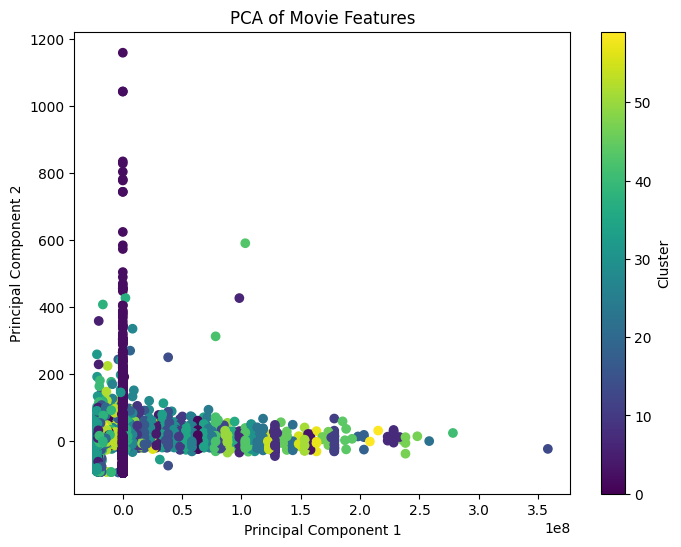

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'reduced_features' from your clustering section is available
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_features_2d = pca.fit_transform(reduced_features)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_features_2d[:, 0], reduced_features_2d[:, 1], c=movies_df['cluster'], cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Movie Features")
plt.colorbar(label="Cluster")
plt.show()

* La visualización del **PCA** muestra cómo las películas se distribuyen en el espacio reducido de **dos componentes principales**, donde cada punto representa una película. A diferencia del t-SNE, el PCA utiliza una transformación lineal para capturar la mayor varianza posible en los datos originales en las primeras dos dimensiones. En la gráfica, podemos observar una gran concentración de puntos cerca del eje vertical (componente 1), lo que sugiere que gran parte de la varianza está capturada por esta primera dimensión. Sin embargo, también hay una dispersión hacia los extremos, indicando la presencia de películas con características más variadas.

* La dispersión de los puntos hacia valores extremos en la **Componente 2** sugiere que, aunque el PCA logró reducir la dimensionalidad, los datos aún conservan cierta complejidad en términos de diversidad. La separación no es tan clara como en el t-SNE, lo que es característico del PCA cuando los datos originales no se distribuyen linealmente. Esta técnica es útil para observar tendencias globales y varianzas dominantes, pero puede no ser tan efectiva como t-SNE para revelar agrupamientos locales complejos en datos de alta dimensionalidad.

##Embeddings

In [1]:
!pip install sentence_transformers

In [42]:
!pip uninstall -y tensorflow && pip install tensorflow-cpu

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.3/381.3 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: ke

In [2]:
!pip uninstall -y tensorflow tf-keras
!pip install tensorflow
!pip install tf-keras

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: tf_keras 2.15.1
Uninstalling tf_keras-2.15.1:
  Successfully uninstalled tf_keras-2.15.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.3/381.3 kB 25.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15

In [3]:
from sentence_transformers import SentenceTransformer, util

#Otra opción de modelo -> SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
mp = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Debido a la demora en el proceso de codificación del embedding, se optó por ejecutarlo y almacenarlo previamente para optimizar el uso de recursos:

In [4]:
#embeddings = mp.encode(movies_df['overview'])

In [5]:
#np.save('embedding.npy', embeddings)

In [44]:
#from google.colab import files
#files.download('embedding.npy')

In [7]:
import numpy as np

embeddings = np.load('/content/embedding.npy')
embeddings

array([[ 0.02540499, -0.09251774,  0.27215263, ...,  0.5825516 ,
         0.28409877,  0.00579838],
       [ 0.25047925,  0.00825739, -0.01806336, ...,  0.11739376,
         0.02428114, -0.32132134],
       [-0.18674998,  0.37858686,  0.19608602, ...,  0.14791805,
         0.07094071,  0.09700936],
       ...,
       [-0.17855725,  0.15349732,  0.25100416, ..., -0.3081546 ,
        -0.12165654,  0.4910173 ],
       [ 0.27873936, -0.1242614 ,  0.274672  , ...,  0.10419848,
        -0.01400617,  0.06058214],
       [ 0.06688087,  0.23280346, -0.2934937 , ..., -0.7122821 ,
         0.0713431 , -0.00988976]], dtype=float32)

In [34]:
# Reducir dimensionalidad con PCA
pca = PCA(n_components=50)  # Puedes ajustar el número de componentes
reduced_embeddings = pca.fit_transform(embeddings)

In [35]:
n_clusters = 60

# Ajustar KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(embeddings)

# Obtener las etiquetas de los clusters
movies_df['cluster'] = kmeans.labels_

In [36]:
# Función para obtener el cluster de una película dada
def get_cluster_by_movie(movie_name, df, model, kmeans):
    # Generar el embedding de la película de entrada
    movie_embedding = model.encode([movie_name])

    # Predecir el cluster de la película
    predicted_cluster = kmeans.predict(movie_embedding)

    # Filtrar el DataFrame para obtener las películas del mismo cluster
    clustered_movies = df[df['cluster'] == predicted_cluster[0]]

    return clustered_movies[['title', 'overview']]

# Ejemplo de uso: Buscar agrupación para una película
movie_to_search = "Pocahontas"  # Película que te interesa
clustered_movies_df = get_cluster_by_movie(movie_to_search, movies_df, mp, kmeans)

# Mostrar las películas agrupadas basadas en el nombre de "Pocahontas"
clustered_movies_df

,title,overview
46,Pocahontas,History comes gloriously to life in Disney's e...
130,From the Journals of Jean Seberg,Mark Rappaport's creative bio-pic about actres...
198,Unzipped,"Using a variety of cinematographic techniques,..."
233,Farinelli,Farinelli is a 1994 biopic film about the life...
295,Prêt-à-Porter,Paris Fashion Week draws the usual bunch of pe...
...,...,...
42192,Weiser,"The film is based on the well-known, translate..."
42194,How A Sausage Dog Works,Polish animated short film that uses unconvent...
42199,Sang Pemimpi,This movie is an adaptation from a popular nov...
42248,Black Sun,Blurred images illustrate the narration of Hug...


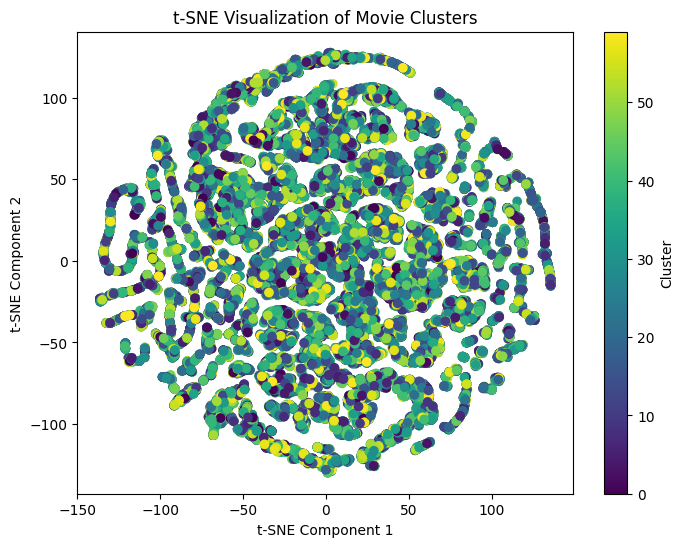

In [37]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Aplicamos t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_features_tsne = tsne.fit_transform(reduced_features)


# Visualizamos
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features_tsne[:, 0], reduced_features_tsne[:, 1], c=movies_df['cluster'], cmap='viridis')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Movie Clusters")
plt.colorbar(label="Cluster")
plt.show()

* La visualización t-SNE muestra cómo las películas se organizan en diferentes grupos o clusters al reducir las dimensiones de las características de texto. Cada punto representa una película y su color indica el cluster al que pertenece, facilitando la identificación de agrupamientos locales donde las películas tienen características similares, además la estructura circular observada es común en t-SNE y refleja cómo se preservan las relaciones locales dentro del conjunto de datos.

* La densidad de los clusters varía, con regiones más compactas en el centro que representan películas con características muy similares, mientras que los puntos más dispersos en los bordes pueden indicar transiciones entre clusters o incluso outliers. La barra de colores, que indica hasta 56 clusters, sugiere que el algoritmo de clustering utilizado (como KMeans) logró separar múltiples grupos con cierta claridad, aunque puede haber áreas de solapamiento debido a similitudes en los datos originales.


# Conclusiones Modelos:
* Regresión Logística:
EL modelo muestra un desempeño variado entre los diferentes géneros cinematográficos, pues algunas categorías como Acción, Comedia, Documentales y Drama tienen métricas relativamente altas, mientras que otras como Extranjero, Película de TV y Western tienen un rendimiento muy bajo. En general, este modelo parece tener margen de mejora, especialmente en las áreas más débiles.
* Árbol de Decisiones:
El modelo de árbol de decisión presenta un desempeño más consistente y mejor que el de regresión logística, puesto que la precisión, el recall y la puntuación F1 son más altos en general, con menos géneros que sobresalen negativamente. Categorías como Acción, Animación, Documentales y Comedia son predichas con bastante eficacia, sin embargo, aún hay algunas áreas problemáticas, como Película de TV y Extranjero.
* Bosque Aleatorio:
Este modelo de aprendizaje automático parece ser el de mejor desempeño de los tres analizados porque tiene las métricas más altas y más consistentes a través de los diferentes géneros, en especial este modelo muestra una gran capacidad para capturar patrones complejos en los datos y hacer predicciones más precisas y desde nuestro punto de vista es el modelo que se destaca como el más robusto y eficaz para esta tarea de clasificación.
* Redes Neuronales:
El modelo de red neuronal no se queda atrás, pues también posee un rendimiento sólido, con puntuaciones altas de precisión, recall y F1 en la mayoría de las categorías. Si bien quizás no tan consistente como el bosque aleatorio, sigue siendo un contendiente fuerte.
* SGDClassifier:
Este modelo, basado en el Clasificador de Gradiente Descendente Estocástico, muestra fortalezas en algunos géneros como Comedia y Drama, pero en general su desempeño es más desigual y menos robusto que los modelos anteriores.
* En general, se puede concluir que la tarea de clasificación de géneros cinematográficos presenta un nivel de dificultad moderado y que los modelos más avanzados, como el bosque aleatorio y la red neuronal, han demostrado ser capaces de lograr un buen desempeño en esta tarea, superando a los modelos más simples como la regresión logística y el árbol de decisiones facilitando asi la clasificación de géneros cinematográficos.

# Conclusiones PCA y t-SNE:

| *Criterio*                  | *PCA (Principal Component Analysis)*                                                                 | *t-SNE (t-Distributed Stochastic Neighbor Embedding)*                                      |
|-------------------------------|-------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------|
| *Naturaleza del Modelo*     | Método lineal que busca transformar las variables originales en componentes ortogonales, ordenadas por la cantidad de varianza capturada. | Método no lineal que preserva las relaciones de vecindad local entre puntos en un espacio de menor dimensión. |
| *Reducción de Dimensionalidad* | Optimizado para capturar la *varianza global* de los datos, con componentes principales ordenadas de mayor a menor contribución. | Diseñado para capturar *relaciones locales* y estructuras no lineales entre puntos cercanos, sacrificando cierta información global. |
| *Visualización de Clusters* | Limitada para detectar clusters cuando los datos tienen estructuras no lineales; los clusters suelen estar solapados. | Efectivo para identificar clusters, ya que preserva la proximidad entre puntos similares y organiza patrones complejos de los datos. |
| *Aplicación en Grandes Volúmenes* | Altamente eficiente en grandes volúmenes de datos debido a su menor complejidad computacional. | Costoso computacionalmente y menos eficiente en grandes volúmenes de datos. Mejor para subconjuntos de datos o visualización final. |
| *Interpretabilidad*         | Las componentes principales son lineales y su varianza se puede cuantificar directamente, facilitando su interpretación matemática. | La proyección no es directamente interpretable, ya que no produce componentes lineales ni conserva distancias globales. |
| *Recomendaciones de Uso*    | - Usar cuando el objetivo es *reducir la dimensionalidad* para capturar varianzas globales.  <br> - Ideal para *datos lineales* o cuando la estructura no es altamente compleja. <br> - Excelente para *preprocesamiento* antes de modelos de aprendizaje automático. | - Usar cuando se requiere una *visualización efectiva de clusters* o estructuras no lineales.  <br> - Ideal para tareas exploratorias y de análisis visual donde la *proximidad local* es crítica. <br> - Recomendado para *datos complejos* con patrones no lineales y menor tamaño. |

* A partir de la experiencia con la actividad 11 y sus modelos, concluimos que ajustar los hiperparámetros de los algoritmos puede mejorar métricas como precisión, recall, y posiblemente el F1-score, entre otras. Sin embargo, es crucial considerar el costo computacional y el volumen de datos al realizar estos ajustes. En nuestro caso, el uso de los entornos gratuitos de Colab resultó insuficiente, convirtiéndose en un cuello de botella para el desarrollo óptimo de la actividad.